In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [7]:
data = pd.read_csv("~/Documents/PhD/JIF/uber_icite.tsv", sep = "\t")

In [3]:
#print(data.head(5))

In [4]:
zero_cite = data[data['citation_count'] == 0]
print(len(zero_cite))
#print(zero_cite.head(5))

8608205


In [5]:
zero_cite = zero_cite.sort_values(by=['year','journal'])
zero_cite = zero_cite.dropna(subset=['field_citation_rate'])
print(zero_cite.head(20))

              pmid                        doi  year       journal  \
19798758  20474248  10.1017/s0022172400002680  1906  J Hyg (Lond)   
19798761  20474251  10.1017/s0022172400002734  1906  J Hyg (Lond)   
19798762  20474252  10.1017/s0022172400002746  1906  J Hyg (Lond)   
19798763  20474253  10.1017/s0022172400002758  1906  J Hyg (Lond)   
19798764  20474254  10.1017/s002217240000276x  1906  J Hyg (Lond)   
19798768  20474258  10.1017/s0022172400002801  1906  J Hyg (Lond)   
19798770  20474260  10.1017/s0022172400002825  1906  J Hyg (Lond)   
19798771  20474261  10.1017/s0022172400002837  1906  J Hyg (Lond)   
19798773  20474263  10.1017/s0022172400002874  1906  J Hyg (Lond)   
19798774  20474264  10.1017/s0022172400002886  1906  J Hyg (Lond)   
19798777  20474267  10.1017/s0022172400002916  1906  J Hyg (Lond)   
19798784  20474274  10.1017/s0022172400002989  1906  J Hyg (Lond)   
19798786  20474276  10.1017/s0022172400003028  1906  J Hyg (Lond)   
19798790  20474280  10.1017/s00221

In [6]:
newdf = zero_cite.drop_duplicates(
  subset = ['year', 'journal'],
  keep = 'first').reset_index(drop = True)
print(newdf.head(10))

       pmid                             doi  year       journal  \
0  20474248       10.1017/s0022172400002680  1906  J Hyg (Lond)   
1  20474436       10.1017/s0022172400016557  1911  J Hyg (Lond)   
2  19867524            10.1084/jem.15.3.292  1912     J Exp Med   
3  19867619              10.1084/jem.17.1.1  1913     J Exp Med   
4  19867771            10.1084/jem.19.3.309  1914     J Exp Med   
5  16993264  10.1113/jphysiol.1914.sp001671  1914     J Physiol   
6  19867851             10.1084/jem.21.1.43  1915     J Exp Med   
7  19867977            10.1084/jem.23.2.189  1916     J Exp Med   
8  19868082            10.1084/jem.25.2.195  1917     J Exp Med   
9  16558787     10.1128/jb.3.2.189-191.1918  1918   J Bacteriol   

  is_research_article  citation_count  field_citation_rate  \
0                 Yes               0             0.275862   
1                 Yes               0             0.250000   
2                 Yes               0             0.361446   
3             

In [7]:
tmp = newdf[newdf['journal'] == 'J Hyg (Lond)']
tmp = tmp[tmp['year'] == 1911]
print(tmp)

       pmid                        doi  year       journal  \
1  20474436  10.1017/s0022172400016557  1911  J Hyg (Lond)   

  is_research_article  citation_count  field_citation_rate  \
1                 Yes               0                 0.25   

   expected_citations_per_year  citations_per_year  relative_citation_ratio  \
1                          NaN                 0.0                      NaN   

   nih_percentile   apt is_clinical cited_by_clin   x_coord  y_coord  human  \
1             NaN  0.05          No           NaN  0.866025     -0.5    0.0   

   animal  molecular_cellular provisional  
1     1.0                 0.0          No  


In [8]:
threshold_10 = newdf[newdf['field_citation_rate'] < 10]
threshold_10 = threshold_10.sort_values(by=['year','journal'], ascending = False)
print(threshold_10.head(30))
threshold_10.to_csv("journal_lower_jif10.csv", index = False)

            pmid                                       doi  year  \
116107  30701191                 10.1128/mSystems.00010-19  2019   
116106  30700510                  10.1128/mSphere.00575-18  2019   
116105  30647160                     10.1128/mBio.02698-18  2019   
116104  30639186                10.1016/j.isci.2018.12.007  2019   
116103  31011635               10.1016/j.ensci.2019.100190  2019   
116102  30656209               10.1523/ENEURO.0142-18.2018  2019   
116101  30516453                 10.1017/S096719941800059X  2019   
116100  31050204                         10.1111/zph.12556  2019   
116099  30736928                10.1016/j.zool.2019.01.001  2019   
116098  30858988                 10.1186/s40851-019-0121-7  2019   
116097  31116532                          10.2108/zs180107  2019   
116096  31966304                     10.6620/ZS.2019.58-03  2019   
116095  29955030        10.24272/j.issn.2095-8137.2018.044  2019   
116094  30636910                 10.3897/zookeys

In [9]:
d = threshold_10[threshold_10['journal'] == 'Cell']
print(d.head(10))

Empty DataFrame
Columns: [pmid, doi, year, journal, is_research_article, citation_count, field_citation_rate, expected_citations_per_year, citations_per_year, relative_citation_ratio, nih_percentile, apt, is_clinical, cited_by_clin, x_coord, y_coord, human, animal, molecular_cellular, provisional]
Index: []


In [18]:
##pick a journal of a particular year. take all the pmids of that year and journal and plot their rcr.

In [10]:
journ = ["Nat Genet", "Cell", "Cancer Cell","Hum Reprod Update","Stroke","eNeuro","Microbiome","World Neurosurg","Semin Immunol"]
year = [2019, 2019, 2019,2019, 2019, 2019, 2019,2019,2019]
jcr = []
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
print(jcr)

[24.457076566125313, 32.500533617929634, 25.016064257028095, 11.4133333333333, 6.210909090909103, 3.345744680851058, 11.104, 1.6806333739342316, 8.68932038834952]


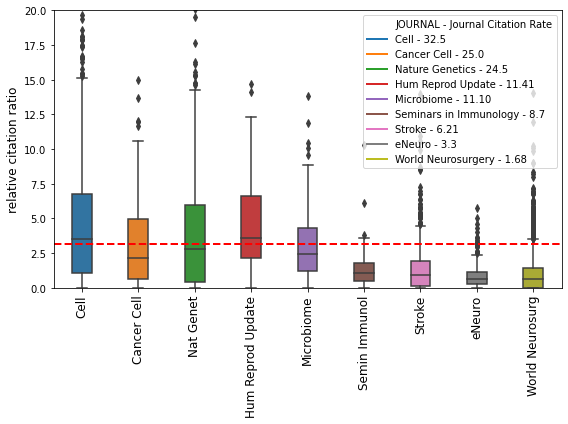

In [11]:
d = pd.DataFrame()
journ = ["Nat Genet", "Cell", "Cancer Cell"]
year = [2019, 2019, 2019]
j_lo = ["Hum Reprod Update","Stroke","eNeuro","Microbiome","World Neurosurg","Semin Immunol"]
y_lo = [2019, 2019, 2019, 2019,2019,2019]

d = data[data['journal'] == journ[0]]
d = d[d['year'] == year[0]]
d['jcr'] = jcr[0]


a = data[data['journal'] == journ[1]]
a = a[a['year'] == year[1]]
a['jcr'] = jcr[1]

d = pd.concat([d,a], axis = 0)

a = data[data['journal'] == journ[2]]
a = a[a['year'] == year[2]]
a['jcr'] = jcr[2]

d = pd.concat([d,a], axis = 0)

med_rcr = d['relative_citation_ratio'].median()

for i in range(len(j_lo)):
    a = data[data['journal'] == j_lo[i]]
    a = a[a['year'] == y_lo[i]]
    a['jcr'] = jcr[3+i]
    d = pd.concat([d,a], axis = 0)


    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r
'''

d = d.sort_values(by=['jcr'], ascending = False)
d.to_csv("xxx_test.csv", index = False)


custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12) 
ax.set(xlabel=None)
plt.ylabel('relative citation ratio', fontsize = 12)
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate","Cell - 32.5", "Cancer Cell - 25.0", "Nature Genetics - 24.5",
                          "Hum Reprod Update - 11.41","Microbiome - 11.10","Seminars in Immunology - 8.7","Stroke - 6.21","eNeuro - 3.3",
                          "World Neurosurgery - 1.68"], loc='upper right')
#plt.show()
plt.tight_layout()
plt.savefig("thres_20.png", dpi = 1000)

In [12]:
journ = ["Sci Transl Med", "Nat Neurosci", "Immunity","mBio","Neuron","World J Emerg Surg","Yale J Biol Med","World J Surg","Sleep Med Rev"]
year = [2018, 2017, 2017,2018, 2019, 2018, 2019,2019, 2019]
jcr = []
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
print(jcr)

[15.7844827586207, 19.0625, 19.7161803713528, 6.358361774744028, 12.066285714285721, 3.28421052631579, 3.1456310679611694, 1.9805045871559621, 8.90853658536585]


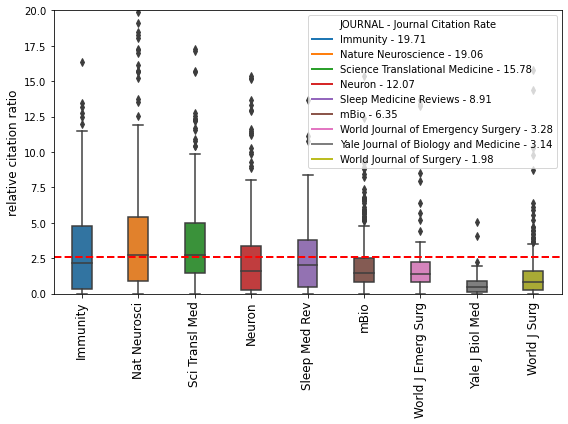

In [13]:
d = pd.DataFrame()
journ = ["Sci Transl Med", "Nat Neurosci", "Immunity"]
year = [2018, 2017, 2017]
j_lo = ["mBio","Neuron","World J Emerg Surg","Yale J Biol Med","World J Surg","Sleep Med Rev"]
y_lo = [2018, 2019, 2018, 2019,2019, 2019]

d = data[data['journal'] == journ[0]]
d = d[d['year'] == year[0]]
d['jcr'] = jcr[0]


a = data[data['journal'] == journ[1]]
a = a[a['year'] == year[1]]
a['jcr'] = jcr[1]

d = pd.concat([d,a], axis = 0)

a = data[data['journal'] == journ[2]]
a = a[a['year'] == year[2]]
a['jcr'] = jcr[2]

d = pd.concat([d,a], axis = 0)

med_rcr = d['relative_citation_ratio'].median()

for i in range(len(j_lo)):
    a = data[data['journal'] == j_lo[i]]
    a = a[a['year'] == y_lo[i]]
    a['jcr'] = jcr[3+i]
    d = pd.concat([d,a], axis = 0)
    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r
d.to_csv("xxx_test.csv", index = False)'''

d = d.sort_values(by=['jcr'], ascending = False)
d.to_csv("xxx_test.csv", index = False)

custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12) 
plt.ylabel('relative citation ratio', fontsize = 12)
ax.set(xlabel=None)
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate","Immunity - 19.71", "Nature Neuroscience - 19.06", "Science Translational Medicine - 15.78",
                          "Neuron - 12.07","Sleep Medicine Reviews - 8.91","mBio - 6.35","World Journal of Emergency Surgery - 3.28",
                          "Yale Journal of Biology and Medicine - 3.14","World Journal of Surgery - 1.98"], loc='upper right')
#plt.show()
#plt.show()
plt.tight_layout()
plt.savefig("thres_15.png", dpi = 1000)

In [15]:
journ = ["Sci Immunol", "Nat Chem Biol", "Neuron","mBio","iScience","World J Emerg Surg","eNeuro","Semin Immunol","Sleep Med Rev"]
year = [2019, 2019, 2018,2018, 2019, 2018, 2019,2019, 2019]
jcr = []
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
print(jcr)

[11.0122699386503, 11.163690476190489, 11.610571736785301, 6.358361774744028, 3.1545454545454588, 3.28421052631579, 3.345744680851058, 8.68932038834952, 8.90853658536585]


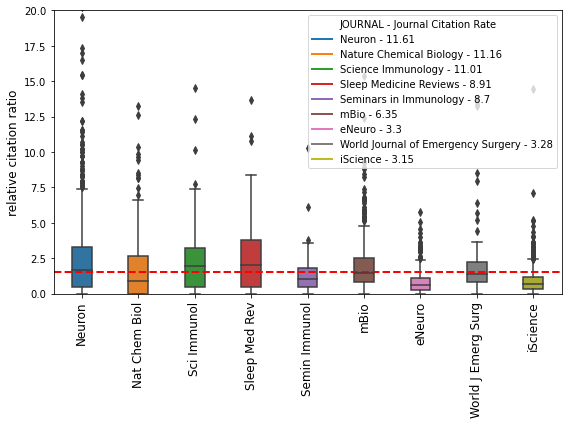

In [16]:
d = pd.DataFrame()
journ = ["Sci Immunol", "Nat Chem Biol", "Neuron"]
year = [2019, 2019, 2018]
j_lo = ["mBio","iScience","World J Emerg Surg","eNeuro","Semin Immunol","Sleep Med Rev"]
y_lo = [2018, 2019, 2018, 2019,2019, 2019]

d = data[data['journal'] == journ[0]]
d = d[d['year'] == year[0]]
d['jcr'] = jcr[0]


a = data[data['journal'] == journ[1]]
a = a[a['year'] == year[1]]
a['jcr'] = jcr[1]

d = pd.concat([d,a], axis = 0)

a = data[data['journal'] == journ[2]]
a = a[a['year'] == year[2]]
a['jcr'] = jcr[2]

d = pd.concat([d,a], axis = 0)

med_rcr = d['relative_citation_ratio'].median()

for i in range(len(j_lo)):
    a = data[data['journal'] == j_lo[i]]
    a = a[a['year'] == y_lo[i]]
    a['jcr'] = jcr[3+i]
    d = pd.concat([d,a], axis = 0)

    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r'''


d = d.sort_values(by=['jcr'], ascending = False)
d.to_csv("xxx_test.csv", index = False)

custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12)
plt.ylabel('relative citation ratio', fontsize = 12)
ax.set(xlabel=None)
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate","Neuron - 11.61", "Nature Chemical Biology - 11.16", "Science Immunology - 11.01",
                          "Sleep Medicine Reviews - 8.91","Seminars in Immunology - 8.7","mBio - 6.35",
                          "eNeuro - 3.3","World Journal of Emergency Surgery - 3.28","iScience - 3.15"], loc='upper right')
plt.tight_layout()
#plt.show()
plt.savefig("thres_10.png", dpi = 1000)

In [47]:
pal = sns.color_palette('tab10')
pal.as_hex()[8]

'#bcbd22'

[24.457076566125313, 32.500533617929634, 25.016064257028095, 11.4133333333333, 6.210909090909103, 3.345744680851058, 11.104, 1.6806333739342316, 8.68932038834952]


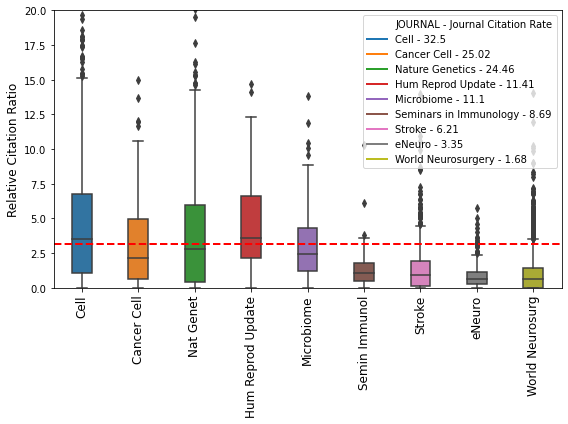

In [18]:
journ = ["Nat Genet", "Cell", "Cancer Cell","Hum Reprod Update","Stroke","eNeuro","Microbiome","World Neurosurg","Semin Immunol"]
year = [2019,          2019,     2019,          2019,             2019,    2019,      2019,         2019,          2019]
jcr = []
dict2 = {}
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
    dict2[jr] = round(ff['field_citation_rate'].mean(),2)
print(jcr)

dict1 = {"Nat Genet":"Nature Genetics", "Cell":"Cell", "Cancer Cell":"Cancer Cell","Hum Reprod Update":"Hum Reprod Update",
         "Stroke":"Stroke","eNeuro":"eNeuro","Microbiome":"Microbiome","World Neurosurg":"World Neurosurgery",
         "Semin Immunol":"Seminars in Immunology"}


d = pd.DataFrame()

'''journ = ["Nat Genet", "Cell", "Cancer Cell"]
year = [2019, 2019, 2019]
j_lo = ["Hum Reprod Update","Stroke","eNeuro","Microbiome","World Neurosurg","Semin Immunol"]
y_lo = [2019, 2019, 2019, 2019,2019,2019]

d = data[data['journal'] == journ[0]]
d = d[d['year'] == year[0]]
d['jcr'] = jcr[0]


a = data[data['journal'] == journ[1]]
a = a[a['year'] == year[1]]
a['jcr'] = jcr[1]

d = pd.concat([d,a], axis = 0)

a = data[data['journal'] == journ[2]]
a = a[a['year'] == year[2]]
a['jcr'] = jcr[2]

d = pd.concat([d,a], axis = 0)'''

med_rcr = 0

for i in range(len(journ)):
    a = data[data['journal'] == journ[i]]
    a = a[a['year'] == year[i]]
    a['jcr'] = jcr[i]
    d = pd.concat([d,a], axis = 0)
    if i == 2:
        med_rcr = d['relative_citation_ratio'].median()


    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r
'''

d = d.sort_values(by=['jcr'], ascending = False)
#d.to_csv("xxx_test.csv", index = False)
jj = d['journal'].unique()


custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12) 
ax.set(xlabel=None)
plt.ylabel('Relative Citation Ratio', fontsize = 12)
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate",dict1[jj[0]]+" - "+str(dict2[jj[0]]), dict1[jj[1]]+" - "+str(dict2[jj[1]]),
dict1[jj[2]]+" - "+str(dict2[jj[2]]),dict1[jj[3]]+" - "+str(dict2[jj[3]]),dict1[jj[4]]+" - "+str(dict2[jj[4]]),
dict1[jj[5]]+" - "+str(dict2[jj[5]]),dict1[jj[6]]+" - "+str(dict2[jj[6]]),
dict1[jj[7]]+" - "+str(dict2[jj[7]]),dict1[jj[8]]+" - "+str(dict2[jj[8]])], loc='upper right')
#plt.show()
plt.tight_layout()
plt.savefig("thres_20.png", dpi = 1000)

[15.7844827586207, 19.0625, 19.7161803713528, 6.358361774744028, 12.066285714285721, 3.28421052631579, 3.1456310679611694, 1.9805045871559621, 8.90853658536585]


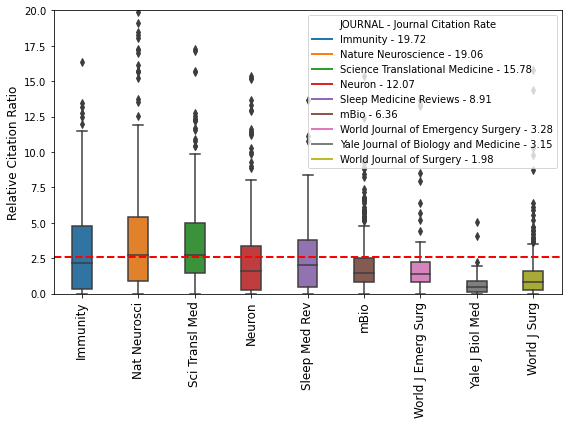

In [16]:
journ = ["Sci Transl Med", "Nat Neurosci", "Immunity","mBio","Neuron","World J Emerg Surg","Yale J Biol Med","World J Surg","Sleep Med Rev"]
year = [2018,                   2017,         2017,    2018,  2019,     2018,                 2019,             2019,           2019]
jcr = []
dict2 = {}
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
    dict2[jr] = round(ff['field_citation_rate'].mean(),2)
print(jcr)

dict1 = {"Nat Genet":"Nature Genetics", "Cell":"Cell", "Cancer Cell":"Cancer Cell","Hum Reprod Update":"Hum Reprod Update",
         "Stroke":"Stroke","eNeuro":"eNeuro","Microbiome":"Microbiome","World Neurosurg":"World Neurosurgery",
         "Semin Immunol":"Seminars in Immunology","Sci Transl Med":"Science Translational Medicine",
         "Nat Neurosci":"Nature Neuroscience","Immunity":"Immunity","mBio":"mBio","Neuron":"Neuron",
         "World J Emerg Surg":"World Journal of Emergency Surgery","Yale J Biol Med":"Yale Journal of Biology and Medicine",
         "World J Surg":"World Journal of Surgery","Sleep Med Rev":"Sleep Medicine Reviews"
        }


d = pd.DataFrame()
med_rcr = 0

for i in range(len(journ)):
    a = data[data['journal'] == journ[i]]
    a = a[a['year'] == year[i]]
    a['jcr'] = jcr[i]
    d = pd.concat([d,a], axis = 0)
    if i == 2:
        med_rcr = d['relative_citation_ratio'].median()


    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r
'''

d = d.sort_values(by=['jcr'], ascending = False)
#d.to_csv("xxx_test.csv", index = False)
jj = d['journal'].unique()


custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12) 
ax.set(xlabel=None)
plt.ylabel('Relative Citation Ratio', fontsize = 12)
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate",dict1[jj[0]]+" - "+str(dict2[jj[0]]), dict1[jj[1]]+" - "+str(dict2[jj[1]]),
dict1[jj[2]]+" - "+str(dict2[jj[2]]),dict1[jj[3]]+" - "+str(dict2[jj[3]]),dict1[jj[4]]+" - "+str(dict2[jj[4]]),
dict1[jj[5]]+" - "+str(dict2[jj[5]]),dict1[jj[6]]+" - "+str(dict2[jj[6]]),
dict1[jj[7]]+" - "+str(dict2[jj[7]]),dict1[jj[8]]+" - "+str(dict2[jj[8]])], loc='upper right')
#plt.show()
plt.tight_layout()
plt.savefig("thres_15.png", dpi = 1000)

[11.0122699386503, 11.163690476190489, 11.610571736785301, 6.358361774744028, 3.1545454545454588, 3.28421052631579, 3.345744680851058, 8.68932038834952, 8.90853658536585]


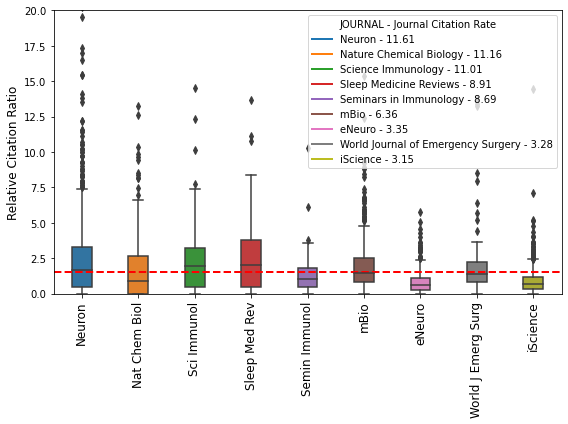

In [17]:
journ = ["Sci Immunol", "Nat Chem Biol", "Neuron","mBio","iScience","World J Emerg Surg","eNeuro","Semin Immunol","Sleep Med Rev"]
year = [   2019,             2019,          2018,  2018,     2019,          2018,          2019,        2019,             2019]
jcr = []
dict2 = {}
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
    dict2[jr] = round(ff['field_citation_rate'].mean(),2)
print(jcr)

dict1 = {"Nat Genet":"Nature Genetics", "Cell":"Cell", "Cancer Cell":"Cancer Cell","Hum Reprod Update":"Hum Reprod Update",
         "Stroke":"Stroke","eNeuro":"eNeuro","Microbiome":"Microbiome","World Neurosurg":"World Neurosurgery",
         "Semin Immunol":"Seminars in Immunology","Sci Transl Med":"Science Translational Medicine",
         "Nat Neurosci":"Nature Neuroscience","Immunity":"Immunity","mBio":"mBio","Neuron":"Neuron",
         "World J Emerg Surg":"World Journal of Emergency Surgery","Yale J Biol Med":"Yale Journal of Biology and Medicine",
         "World J Surg":"World Journal of Surgery","Sleep Med Rev":"Sleep Medicine Reviews",
         "Sci Immunol":"Science Immunology", "Nat Chem Biol":"Nature Chemical Biology","iScience":"iScience"
        }


d = pd.DataFrame()
med_rcr = 0

for i in range(len(journ)):
    a = data[data['journal'] == journ[i]]
    a = a[a['year'] == year[i]]
    a['jcr'] = jcr[i]
    d = pd.concat([d,a], axis = 0)
    if i == 2:
        med_rcr = d['relative_citation_ratio'].median()


    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r
'''

d = d.sort_values(by=['jcr'], ascending = False)
#d.to_csv("xxx_test.csv", index = False)
jj = d['journal'].unique()


custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12) 
ax.set(xlabel=None)
plt.ylabel('Relative Citation Ratio', fontsize = 12)
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate",dict1[jj[0]]+" - "+str(dict2[jj[0]]), dict1[jj[1]]+" - "+str(dict2[jj[1]]),
dict1[jj[2]]+" - "+str(dict2[jj[2]]),dict1[jj[3]]+" - "+str(dict2[jj[3]]),dict1[jj[4]]+" - "+str(dict2[jj[4]]),
dict1[jj[5]]+" - "+str(dict2[jj[5]]),dict1[jj[6]]+" - "+str(dict2[jj[6]]),
dict1[jj[7]]+" - "+str(dict2[jj[7]]),dict1[jj[8]]+" - "+str(dict2[jj[8]])], loc='upper right')
#plt.show()
plt.tight_layout()
plt.savefig("thres_10.png", dpi = 1000)

# new plot in log scale

mer_rcr cn  3.16


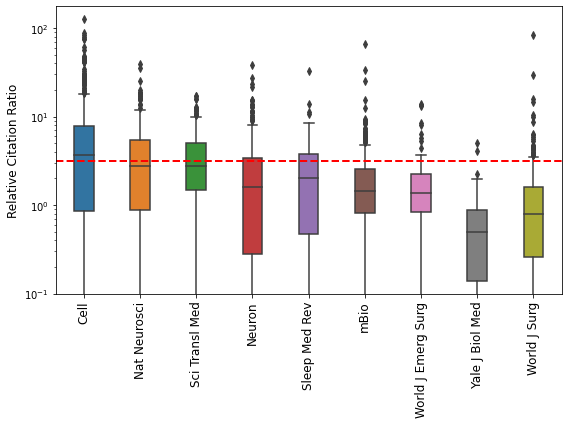

In [11]:
journ = ["Sci Transl Med", "Nat Neurosci", "Cell","mBio","Neuron","World J Emerg Surg","Yale J Biol Med","World J Surg","Sleep Med Rev"]
year = [2018,                   2017,       2017,    2018,  2019,     2018,                 2019,             2019,           2019]
jcr = []
dict2 = {}
for i in range(9):
    #print(i)
    yr = year[i]
    jr = journ[i]
    ff = data[data['year'] == yr]
    ff = ff[ff['journal'] == jr]
    ff = ff[ff['citation_count'] == 0]
    jcr.append(ff['field_citation_rate'].mean())
    dict2[jr] = round(ff['field_citation_rate'].mean(),2)
#print(jcr)

dict1 = {"Nat Genet":"Nature Genetics", "Cell":"Cell", "Cancer Cell":"Cancer Cell","Hum Reprod Update":"Hum Reprod Update",
         "Stroke":"Stroke","eNeuro":"eNeuro","Microbiome":"Microbiome","World Neurosurg":"World Neurosurgery",
         "Semin Immunol":"Seminars in Immunology","Sci Transl Med":"Science Translational Medicine",
         "Nat Neurosci":"Nature Neuroscience","Immunity":"Immunity","mBio":"mBio","Neuron":"Neuron",
         "World J Emerg Surg":"World Journal of Emergency Surgery","Yale J Biol Med":"Yale Journal of Biology and Medicine",
         "World J Surg":"World Journal of Surgery","Sleep Med Rev":"Sleep Medicine Reviews"
        }


d = pd.DataFrame()
med_rcr = 0

for i in range(len(journ)):
    a = data[data['journal'] == journ[i]]
    a = a[a['year'] == year[i]]
    a['jcr'] = jcr[i]
    d = pd.concat([d,a], axis = 0)
    if i == 2:
        med_rcr = d['relative_citation_ratio'].median()

print("mer_rcr cn ",med_rcr)
    
'''j_r = []
for ind in d.index:
    s = d["journal"][ind] + " " + str(d["year"][ind])
    j_r.append(s)
d['journal_year'] = j_r
'''

d = d.sort_values(by=['jcr'], ascending = False)
#d.to_csv("xxx_test.csv", index = False)
jj = d['journal'].unique()


custom_lines = [Line2D([0], [0], color='w', lw=2),
                Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#ff7f0e', lw=2),
                Line2D([0], [0], color='#2ca02c', lw=2),
                Line2D([0], [0], color='#d62728', lw=2),
                Line2D([0], [0], color='#9467bd', lw=2),
                Line2D([0], [0], color='#8c564b', lw=2),
                Line2D([0], [0], color='#e377c2', lw=2),
                Line2D([0], [0], color='#7f7f7f', lw=2),
                Line2D([0], [0], color='#bcbd22', lw=2)]

fig = plt.figure(figsize=(8, 6))
ax = sns.boxplot( x=d["journal"], y=d["relative_citation_ratio"],width=0.35)
plt.axhline(y = med_rcr, linewidth=2, color='r', linestyle = "--")
plt.yscale('log')
#plt.ylim([0,20])
plt.xticks(rotation=90, fontsize = 12) 
ax.set(xlabel=None)
plt.ylabel('Relative Citation Ratio', fontsize = 12)
'''
plt.legend(custom_lines, ["JOURNAL - Journal Citation Rate",dict1[jj[0]]+" - "+str(dict2[jj[0]]), dict1[jj[1]]+" - "+str(dict2[jj[1]]),
dict1[jj[2]]+" - "+str(dict2[jj[2]]),dict1[jj[3]]+" - "+str(dict2[jj[3]]),dict1[jj[4]]+" - "+str(dict2[jj[4]]),
dict1[jj[5]]+" - "+str(dict2[jj[5]]),dict1[jj[6]]+" - "+str(dict2[jj[6]]),
dict1[jj[7]]+" - "+str(dict2[jj[7]]),dict1[jj[8]]+" - "+str(dict2[jj[8]])], loc='center left',bbox_to_anchor=(1.04, 0.5))

'''
#plt.show()
plt.tight_layout()
plt.savefig("thres_15_log_scale.png", dpi = 1000)